In [1]:
# Uncomment for development/debugging
%matplotlib inline
import matplotlib.pyplot as plt

# Uncomment to plot nice-looking final figures
"""
import matplotlib as mpl

mpl.style.use('classic')
mpl.use("pgf")
pgf_with_custom_preamble = {
    "font.family": "serif", # use serif/main font for text elements
    "text.usetex": True,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{unicode-math}",  # unicode math setup
         "\\setmainfont{Doulos SIL}" # serif font via preamble
         ]
}
mpl.rcParams.update(pgf_with_custom_preamble)
"""

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fname = './output/data_100N.csv'
df100 = pd.read_csv(fname)
# del df['Unnamed: 0']
df100.type = df100['type'].map({'known':'orig', 'new':'noisy'})

In [3]:
fname = './output/data_200N.csv'
df200 = pd.read_csv(fname)
# del df['Unnamed: 0']
df200.type = df200['type'].map({'known':'orig', 'new':'noisy'})

In [4]:
fname = './output/data_500N.csv'
df500 = pd.read_csv(fname)
# del df['Unnamed: 0']
df500.type = df500['type'].map({'known':'orig', 'new':'noisy'})

In [5]:
np.sort(df500.d.unique())

array([0.01, 0.05, 0.1 , 0.5 , 1.  ])

In [185]:
pd.set_option('display.max_rows', None)
df100.groupby(by=["d","p","n","U","g"], as_index=False).size()

d     p     n    U      g   
0.01  0.05  16   0.0    0         64
            256  0.0    0       1024
      0.10  15   0.0    0         60
                        1         60
                        2         60
                        4         60
                        16        60
                        32        60
                        64        60
                        128       60
                        256       60
                        512       60
                        1024      60
                        8192      60
                 3.0    1         60
                        2         60
                        4         60
                        16        60
                        32        60
                        64        60
                        128       60
                        256       60
                        512       60
                        1024      60
                        8192      60
                 3.1    1         60
         

In [96]:
nd = []
for row in df100[(df100.p==0.05)].itertuples():
    nd.append((row.n, row.d))
set(nd)

{(16, 0.01),
 (16, 0.05),
 (16, 0.1),
 (16, 0.5),
 (16, 1.0),
 (32, 0.05),
 (32, 0.1),
 (32, 0.5),
 (32, 1.0),
 (64, 0.05),
 (64, 0.1),
 (64, 0.5),
 (64, 1.0),
 (128, 0.05),
 (128, 0.1),
 (128, 0.5),
 (128, 1.0),
 (256, 0.01),
 (256, 0.05),
 (256, 0.1),
 (256, 0.5),
 (256, 1.0),
 (512, 0.05),
 (512, 0.1),
 (512, 0.5),
 (512, 1.0)}

In [117]:
N500_p005 = nd.copy()

In [ ]:
set(N500_p005)

In [ ]:
set(N500_p01)

In [ ]:
set(N500_p02)

In [111]:
set(N200_p02)

{(32, 0.01),
 (32, 0.05),
 (32, 0.5),
 (32, 1.0),
 (64, 0.01),
 (64, 0.05),
 (64, 0.5),
 (64, 1.0),
 (128, 0.01),
 (128, 0.05),
 (128, 0.5),
 (128, 1.0),
 (256, 0.01),
 (256, 0.05),
 (256, 0.5),
 (256, 1.0),
 (512, 0.01),
 (512, 0.05),
 (512, 0.5),
 (512, 1.0)}

In [108]:
set(N200_p005)

{(16, 0.01),
 (16, 0.05),
 (16, 0.5),
 (16, 1.0),
 (32, 0.01),
 (32, 0.05),
 (32, 0.5),
 (32, 1.0),
 (64, 0.01),
 (64, 0.05),
 (64, 0.5),
 (64, 1.0),
 (128, 0.01),
 (128, 0.05),
 (128, 0.5),
 (128, 1.0),
 (256, 0.01),
 (256, 0.05),
 (256, 0.5),
 (256, 1.0),
 (512, 0.01),
 (512, 0.05),
 (512, 0.5),
 (512, 1.0)}

In [100]:
set(N200_p01)

{(32, 0.01),
 (32, 0.05),
 (32, 0.5),
 (32, 1.0),
 (64, 0.01),
 (64, 0.05),
 (64, 0.5),
 (64, 1.0),
 (128, 0.01),
 (128, 0.05),
 (128, 0.5),
 (128, 1.0),
 (256, 0.01),
 (256, 0.05),
 (256, 0.5),
 (256, 1.0),
 (512, 0.01),
 (512, 0.05),
 (512, 0.5),
 (512, 1.0)}

In [ ]:
set(N100_p02)

In [96]:
set(N100_p05)

{(16, 0.01),
 (16, 0.05),
 (16, 0.5),
 (16, 1.0),
 (32, 0.05),
 (32, 0.5),
 (32, 1.0),
 (64, 0.05),
 (64, 0.5),
 (64, 1.0),
 (128, 0.05),
 (128, 0.5),
 (128, 1.0),
 (256, 0.5),
 (512, 0.5)}

In [92]:
set(N100_p01)

{(15, 0.01),
 (15, 0.05),
 (15, 0.1),
 (15, 0.5),
 (15, 0.75),
 (15, 1.0),
 (16, 0.01),
 (16, 0.05),
 (16, 0.1),
 (16, 0.5),
 (16, 0.75),
 (16, 1.0),
 (32, 0.01),
 (32, 0.05),
 (32, 0.1),
 (32, 0.5),
 (32, 0.75),
 (32, 1.0),
 (64, 0.01),
 (64, 0.05),
 (64, 0.1),
 (64, 0.5),
 (64, 0.75),
 (64, 1.0),
 (128, 0.01),
 (128, 0.05),
 (128, 0.1),
 (128, 0.5),
 (128, 0.75),
 (128, 1.0),
 (256, 0.5),
 (512, 0.5)}

# ARTIFICIAL Vectors corrupted by d% change - ERROR NUM

## N=100, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5,  0.75, 1]

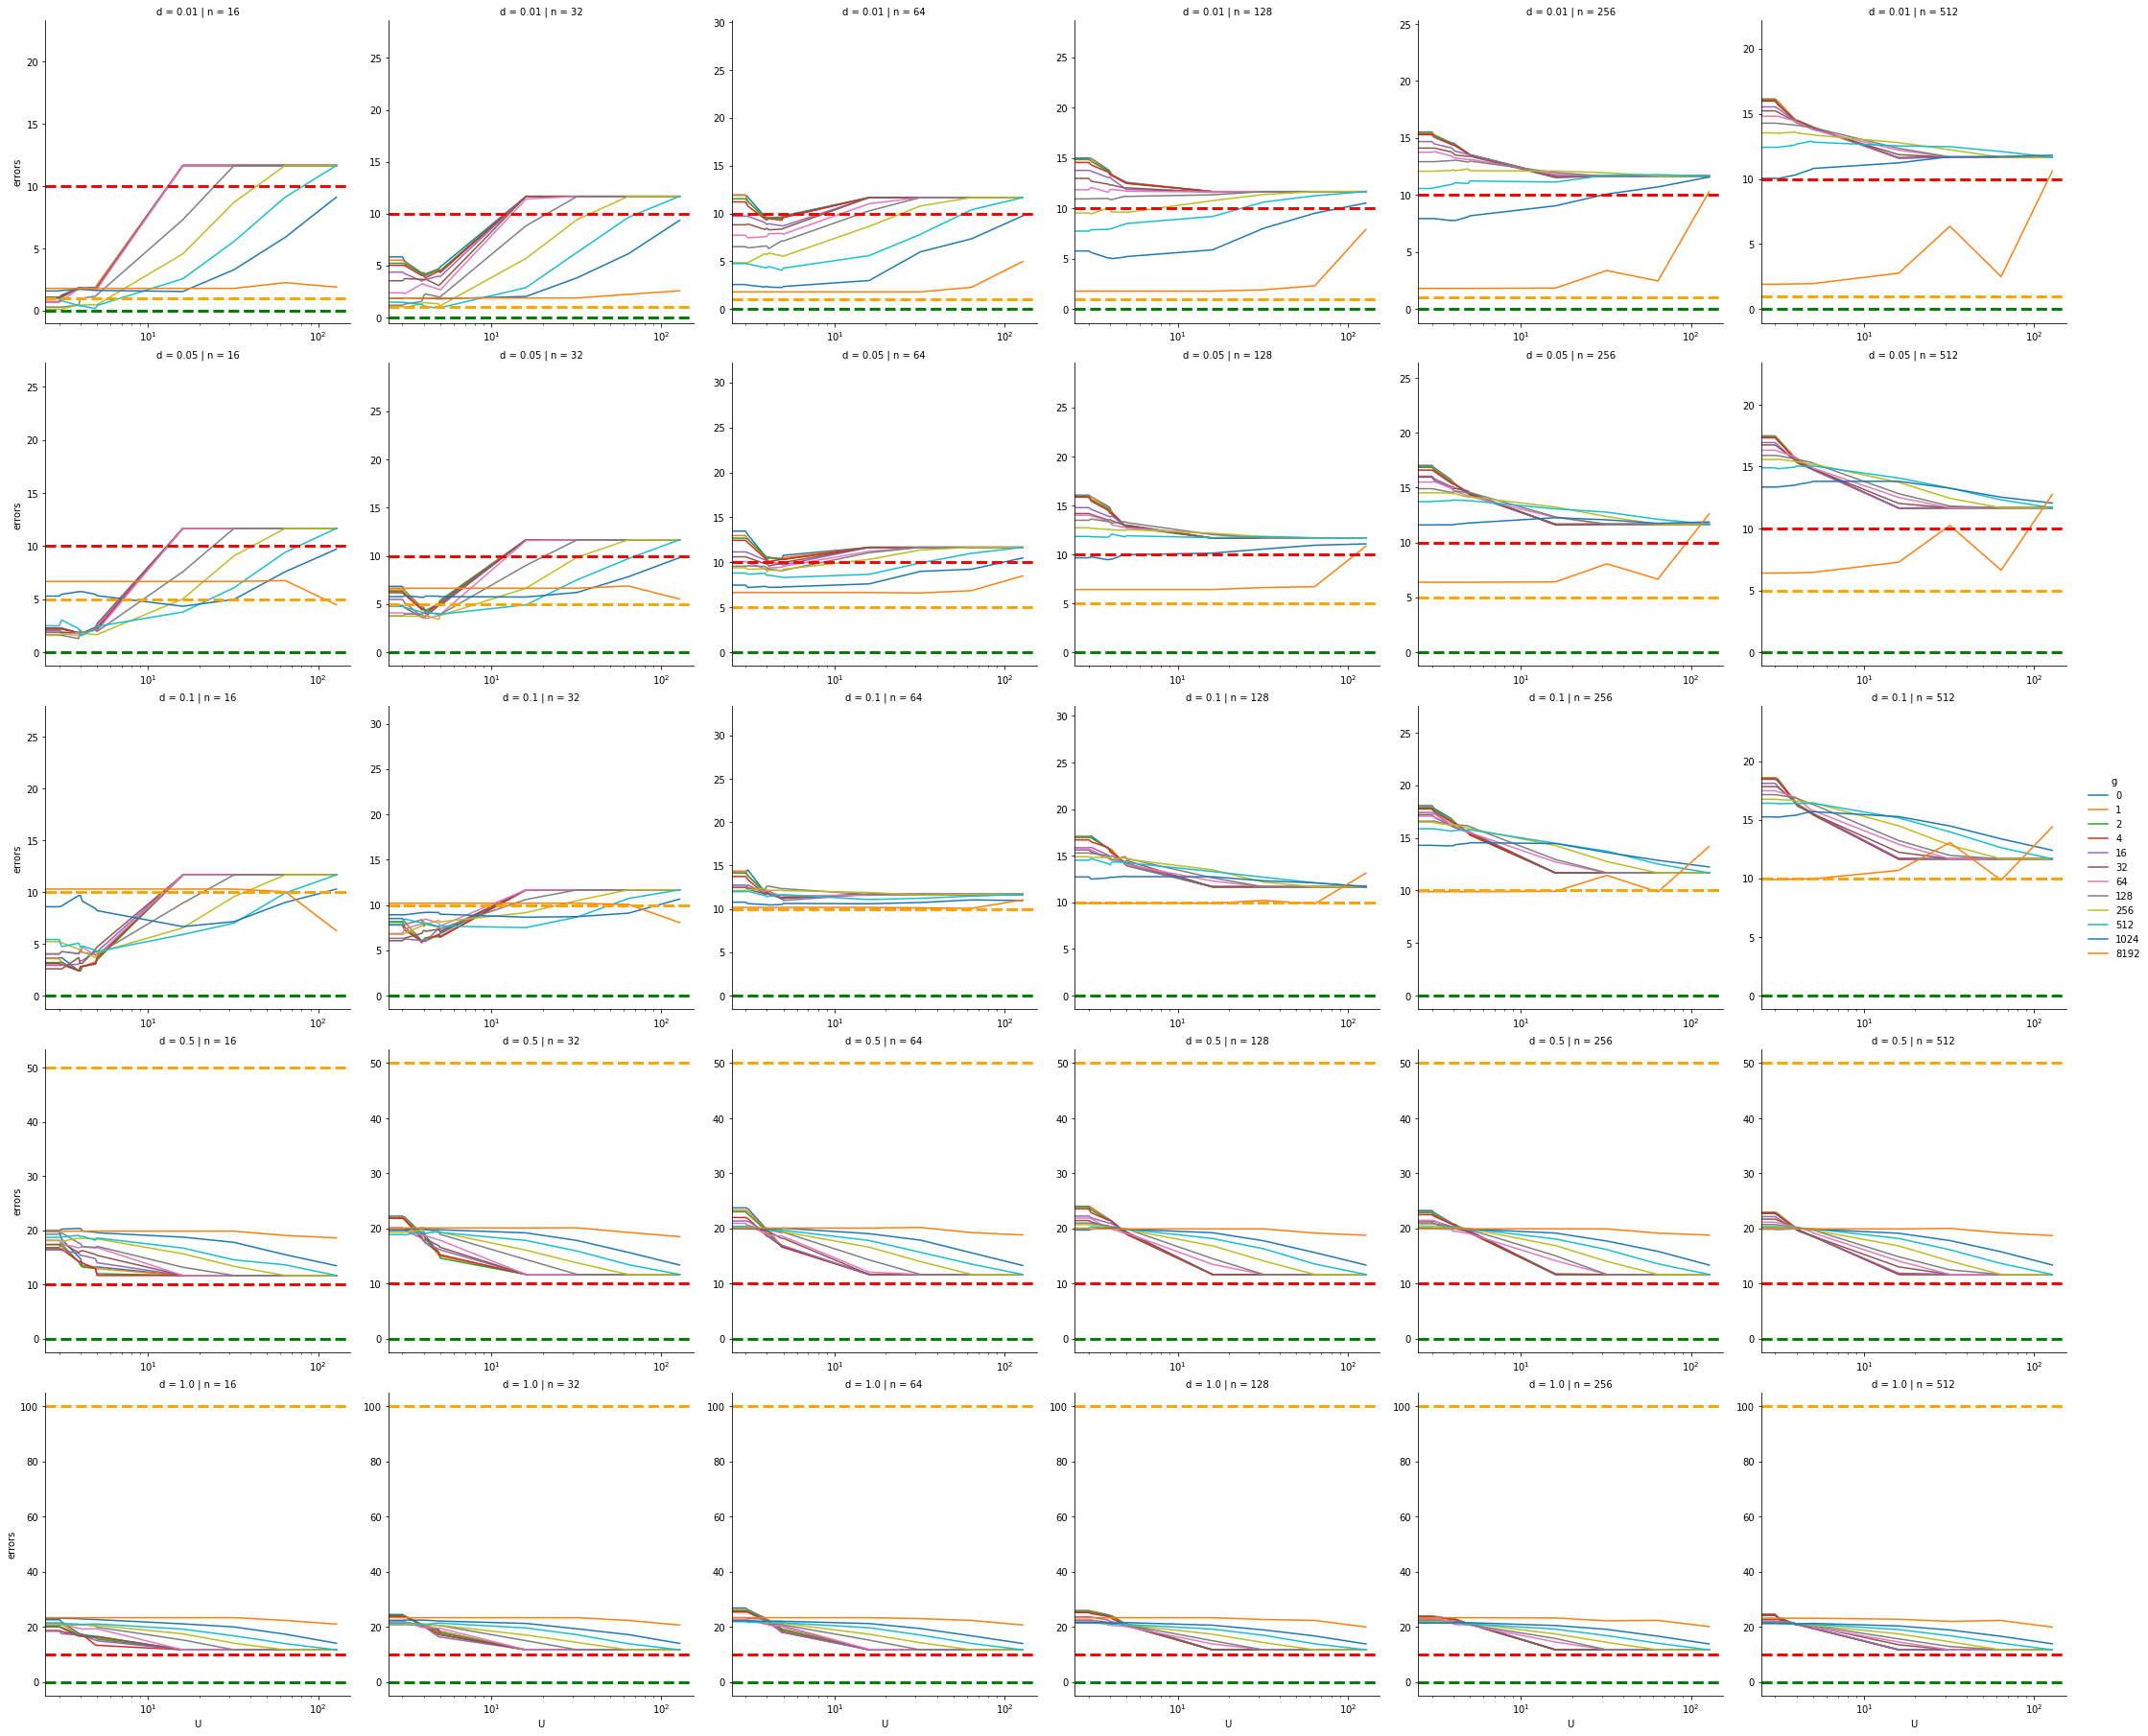

In [6]:
p_fixed = 0.1
N_fixed = 100
d_fixed = 0.5

df100_ = df100[(df100.type == "noisy") & (df100.n > 15)]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df100_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df100_.N)
n = set(df100_.n)
d = set(df100_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## N=200, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5, 1]

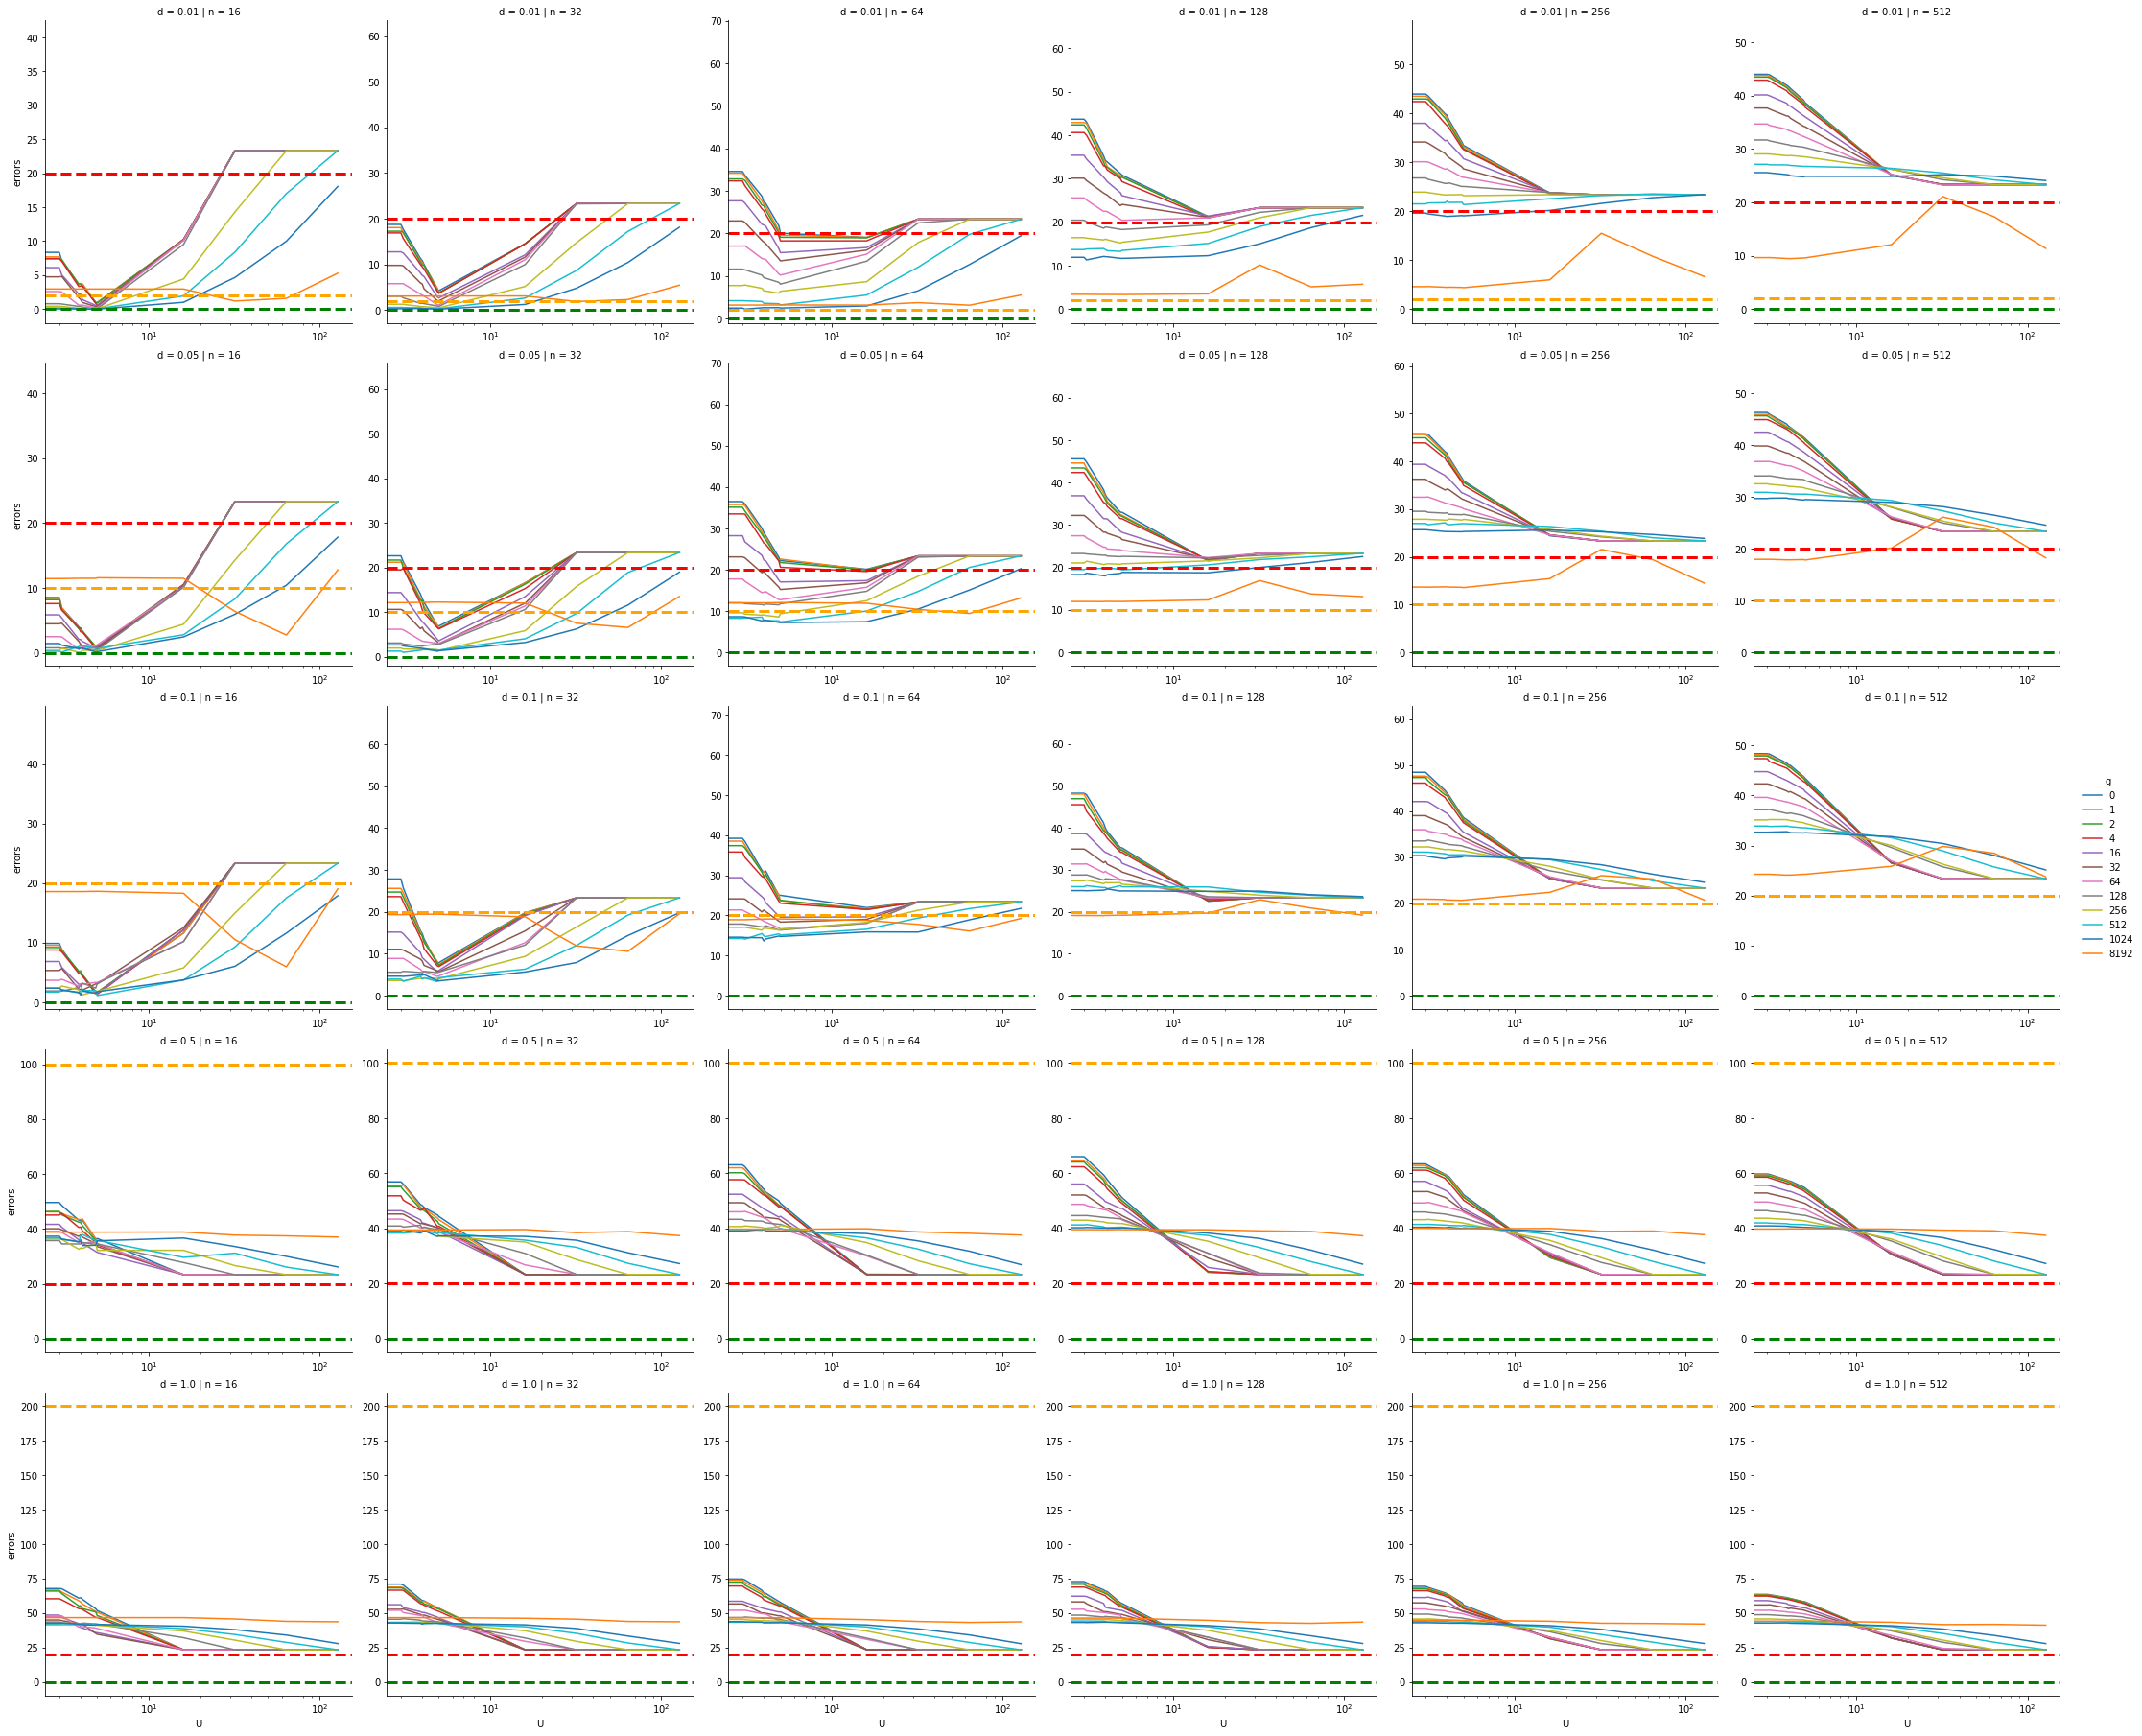

In [7]:
p_fixed = 0.1
N_fixed = 200
d_fixed = 0.5

# df_n = df[(df.type == "noisy") & (df.p == p_fixed) & (df.N == N_fixed) & (df.d == d_fixed)]

df200_ = df200[(df200.type == "noisy")]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df200_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df200_.N)
n = set(df200_.n)
d = set(df200_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## N=500, p=[0.05, 0.1, 0.2], d=[0.01, 0.05, 0.5, 1]

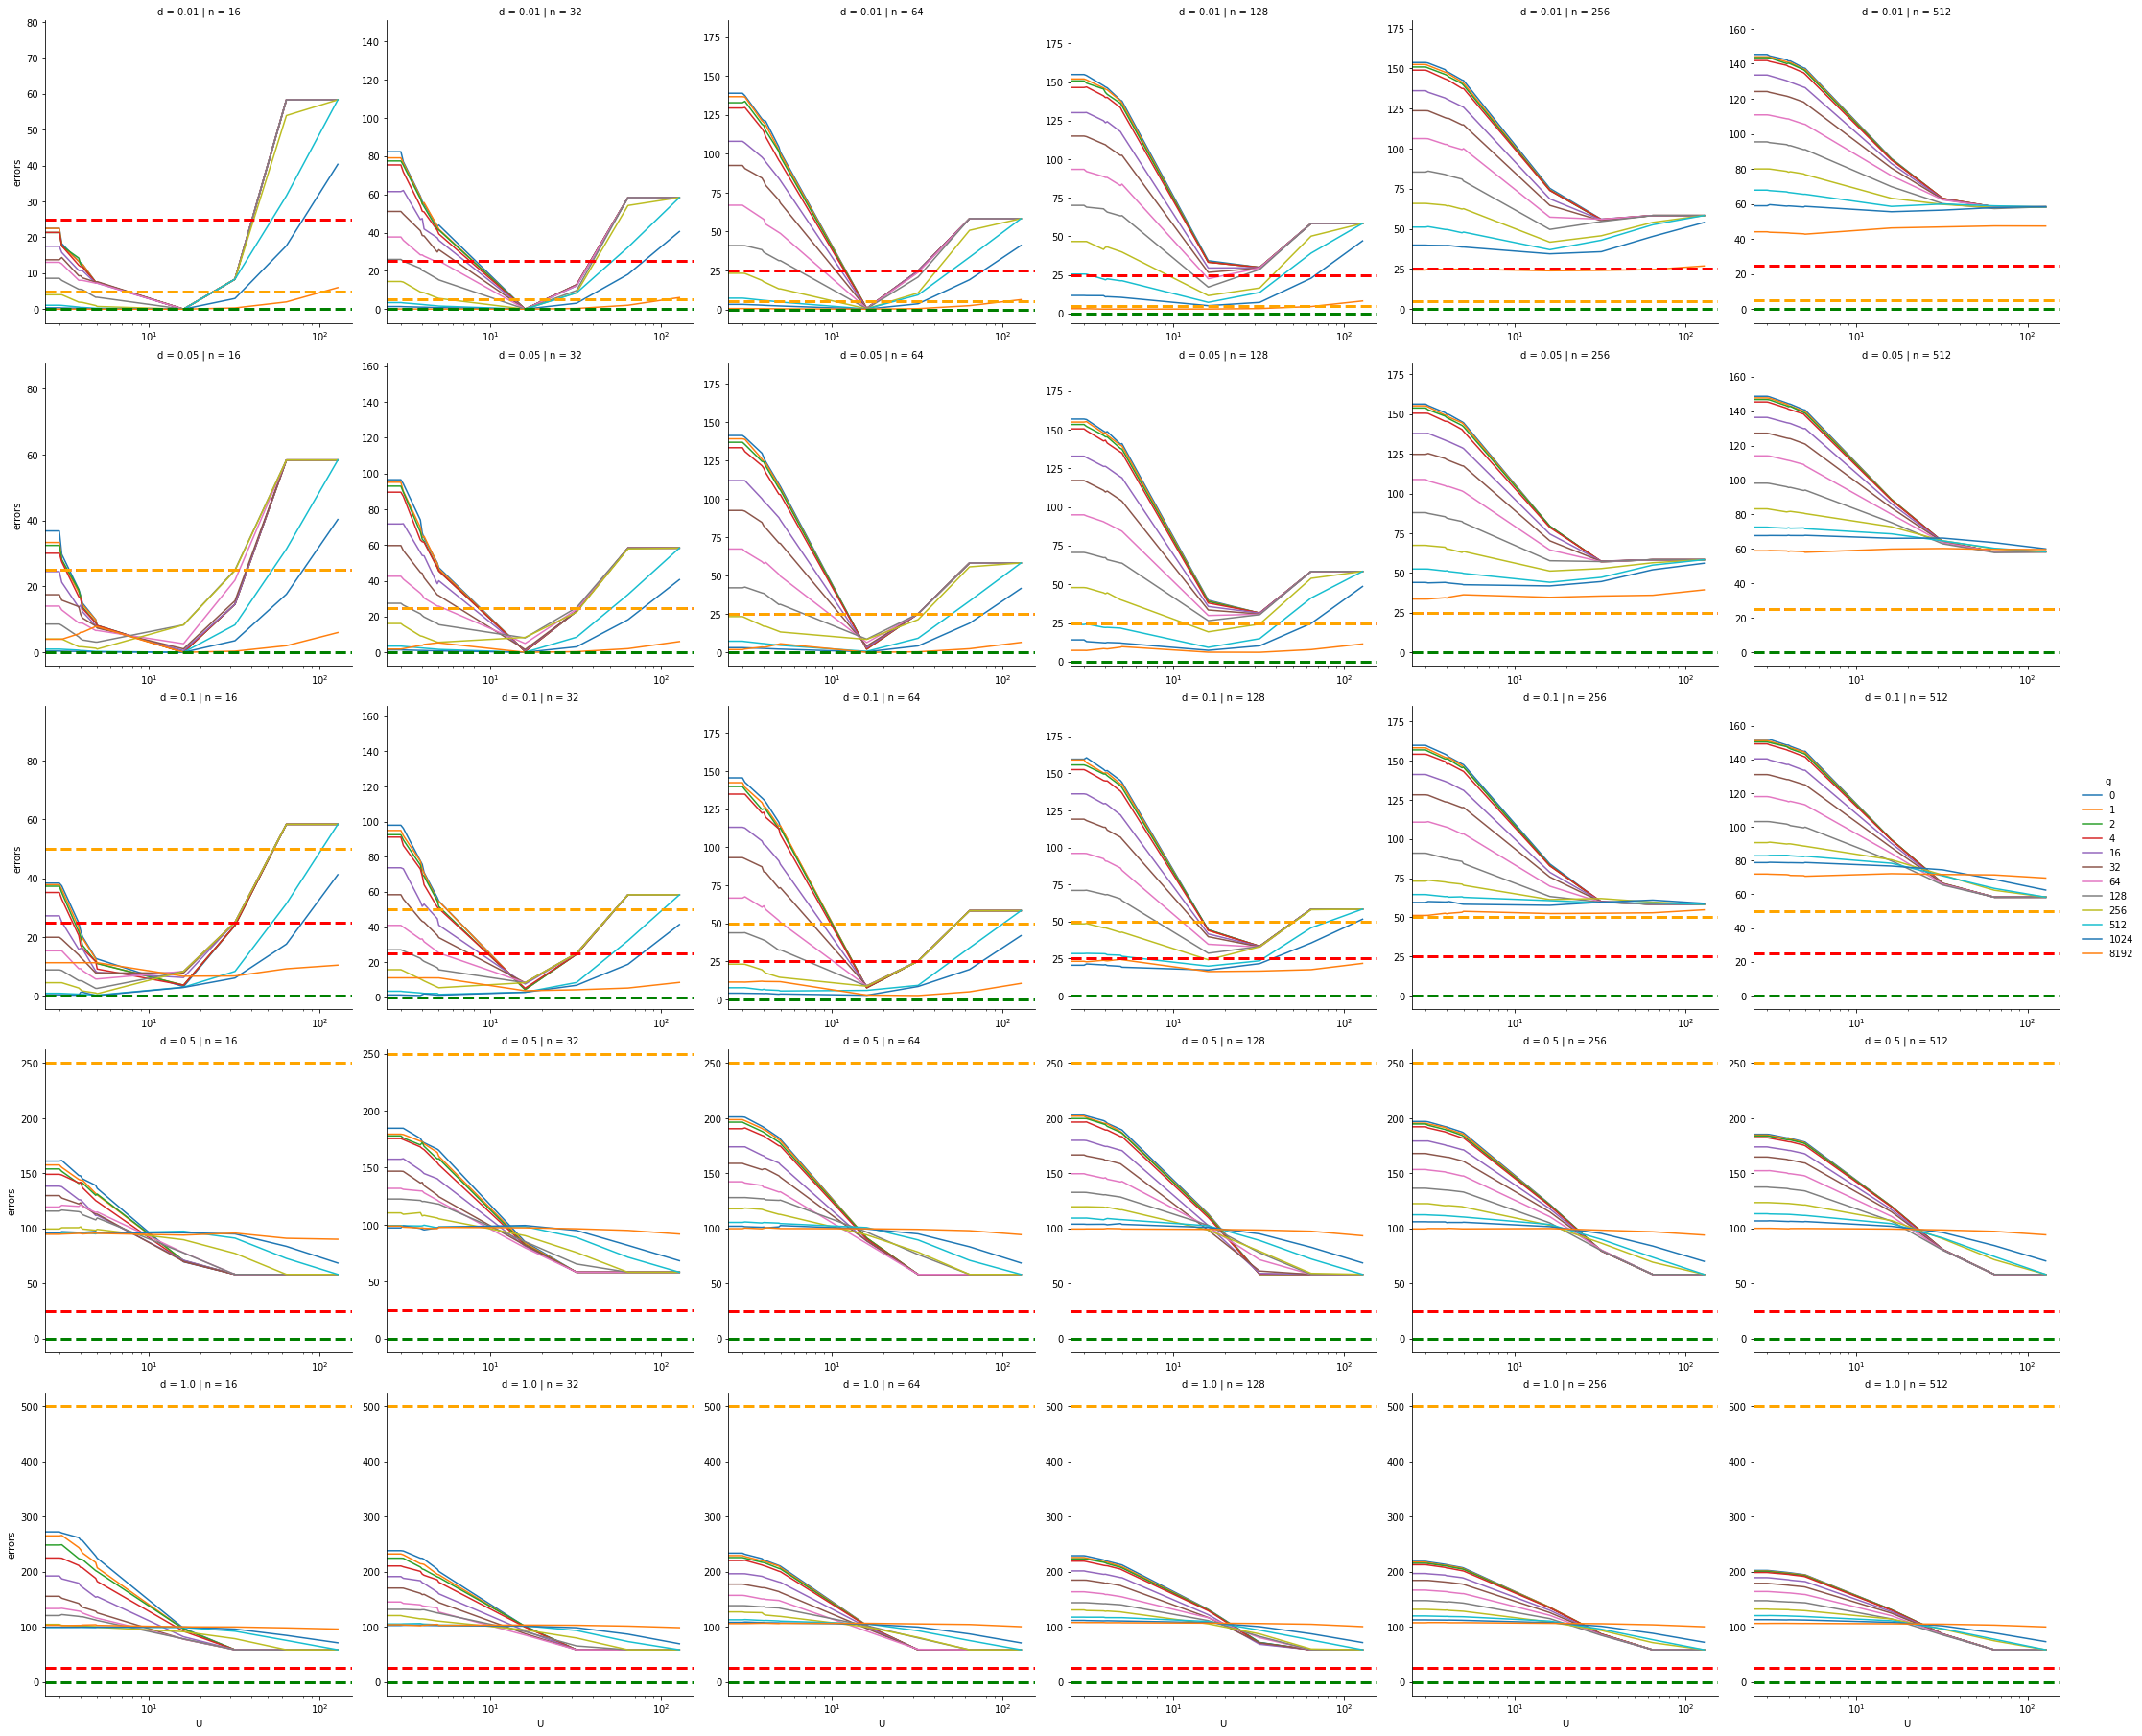

In [8]:
p_fixed = 0.05
N_fixed = 500
d_fixed = 0.5

# df_n = df[(df.type == "noisy") & (df.p == p_fixed) & (df.N == N_fixed) & (df.d == d_fixed)]

df500_ = df500[(df500.type == "noisy")]

g = sns.relplot(x='U', y='errors', hue='g', col='n', row='d', data=df500_, kind='line', facet_kws={'sharey': False, 'sharex': False}, ci=None, palette="tab10")
N = set(df500_.N)
n = set(df500_.n)
d = set(df500_.d)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))

for i in range(len(d)):
    for j in range(len(n)):
        
        g.axes[i,j].set_xscale('log')
        g.axes[i,j].axhline(N_fixed*p_fixed, ls='--', linewidth=3, color='red') #max error if 10% active vals are displaced
        g.axes[i,j].axhline(0, ls='--', linewidth=3, color='green') #0 error
        g.axes[i,j].axhline(d[i]*N_fixed, ls='--', linewidth=3, color='orange') #d

# print all couples u&g with lowest error, print all others not too far

## =============================

## WITH DELTA ERROR

In [70]:
def filter_avg(df_n):
    """
    Averages the errors across parameters.
    """
    df_n = df_n[(df_n.type == "noisy") & ((df_n.p == 0.05) | (df_n.p == 0.1) | (df_n.p == 0.2))]
    df_n = df_n.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
    return(df_n)

In [41]:
def eval_Ug(df_n, N, p, n, d, delta = 1):
    """
    Finds U, g that have the smallest error for a selection of parameters (N, p, n, d) + 
    those U, g pairs that are delta away from min error.
    """
    res = {}
    totals = 0
    U = np.sort(df_n.U.unique())
    g = np.sort(df_n.g.unique())
    
    for i in range(len(N)):
        for l in range(len(p)):
            for j in range(len(n)):
                for k in range(len(d)):
                    df_ijkl = df_n[(df_n.N == N[i]) & (df_n.n == n[j]) & (df_n.d == d[k]) & (df_n.p == p[l])]
                    assert len(df_ijkl) == len(U)*len(g), (df_ijkl, N[i], n[j], d[k], p[l])
                    ind = np.argmin(df_ijkl['errors'])
                    err = df_ijkl.iloc[ind]['errors']
                    df_filt = df_ijkl[(df_ijkl.errors < err + delta)]
                    if err < min(0.9*N[i]*p[l], N[i]*d[k]):
                        totals += 1
                        for row in df_filt.itertuples():
                            if (row.U,row.g) not in res:
                                res[row.U,row.g] = 1
                            else:
                                res[row.U,row.g] = res[row.U,row.g] + 1 


    return(res,totals)

In [11]:
def count_Ug(res, totals, df_n):
    """
    Counts how many time a pair U, g has succeeded.
    DF also contains total possible success times and
    adds 0 for all pairs that never succeeded.
    """
    fin = {"U":[],"g":[],"num":[]}
    U_list = np.sort(df_n.U.unique())
    g_list = np.sort(df_n.g.unique())

    for key in res:
        fin["U"].append(key[0])
        fin["g"].append(key[1])
        fin["num"].append(res[key])


    for U in U_list:
        for g in g_list:
            if not((U,g) in res):
                fin["U"].append(U)
                fin["g"].append(g)
                fin["num"].append(0)

    res_df = pd.DataFrame(fin)
    res_df["total"] = totals
    res_df["prop"] = res_df.num / totals

    return(res_df)

In [12]:
df_n = df200[(df200.type == "noisy") & ((df200.p == 0.05) | (df200.p == 0.1) | (df200.p == 0.2))]

N = set(df_n.N)
n = set(df_n.n)
d = set(df_n.d)
p = set(df_n.p)
U = set(df_n.U)
g = set(df_n.g)
N = np.sort(list(N))
n = np.sort(list(n))
d = np.sort(list(d))
p = np.sort(list(p))

df_n = df_n.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

In [72]:
df_100_ = df100[(df100.type == "noisy") & ((df100.p == 0.05) | (df100.p == 0.1) | (df100.p == 0.2))]

df_200_ = df200[(df200.type == "noisy") & ((df200.p == 0.05) | (df200.p == 0.1) | (df200.p == 0.2))]

df_500_ = df500[(df500.type == "noisy") & ((df500.p == 0.05) | (df500.p == 0.1) | (df500.p == 0.2))]

df_all = pd.concat([df_100_,df_200_,df_500_])

In [43]:
df100avg = df_100_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df200avg = df_200_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df500avg = df_500_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

In [71]:
N100=filter_avg(df100)
N200=filter_avg(df200)
N500=filter_avg(df500)

In [47]:
p05 = filter_avg(df_all[df_all.p==0.05])
p1 = filter_avg(df_all[df_all.p==0.1])
p2 = filter_avg(df_all[df_all.p==0.2])

In [48]:
resN100, totalsN100 = eval_Ug(N100, [100], p,n,d)
resN200, totalsN200 = eval_Ug(N200, [200], p,n,d)
resN500, totalsN500 = eval_Ug(N500, [500], p,n,d)

In [49]:
resp05, totalsp05 = eval_Ug(p05, [100,200,500], [0.05],n,d)
resp1, totalsp1 = eval_Ug(p1, [100,200,500], [0.1],n,d)
resp2, totalsp2 = eval_Ug(p2, [100,200,500], [0.2],n,d)

In [50]:
N100_Ug = count_Ug(resN100, totalsN100, N100)
N200_Ug = count_Ug(resN200, totalsN200, N200)
N500_Ug = count_Ug(resN500, totalsN500, N500)

In [57]:
p05_Ug = count_Ug(resp05, totalsp05, p05)
p1_Ug = count_Ug(resp1, totalsp1, p1)
p2_Ug = count_Ug(resp2, totalsp2, p2)

In [55]:
N100_Ug["N"] = 100
N200_Ug["N"] = 200
N500_Ug["N"] = 500

p05_Ug["p"] = 0.05
p1_Ug["p"] = 0.1
p2_Ug["p"] = 0.2

df_N = pd.concat([N100_Ug,N200_Ug,N500_Ug])
df_p = pd.concat([p05_Ug, p1_Ug, p2_Ug])

In [75]:
df_N

,U,g,num,total,prop,N
0,0.0,128,3,17,0.176471,100
1,0.0,256,8,17,0.470588,100
2,0.0,512,6,17,0.352941,100
3,3.0,0,3,17,0.176471,100
4,3.0,1,3,17,0.176471,100
...,...,...,...,...,...,...
139,128.0,128,0,39,0.000000,500
140,128.0,256,0,39,0.000000,500
141,128.0,512,0,39,0.000000,500
142,128.0,1024,0,39,0.000000,500


In [67]:
# Find top U, g pair choice for each N
# Also keep the U, g pairs that have at least 95% of the top success rate

ind = np.argmax(N100_Ug.prop)
top_choice = N100_Ug.iloc[ind].prop
df_filt100 = N100_Ug[N100_Ug.prop > 0.95*top_choice]

ind = np.argmax(N200_Ug.prop)
top_choice = N200_Ug.iloc[ind].prop
df_filt200 = N200_Ug[N200_Ug.prop > 0.95*top_choice]

ind = np.argmax(N500_Ug.prop)
top_choice = N500_Ug.iloc[ind].prop
df_filt500 = N500_Ug[N500_Ug.prop > 0.95*top_choice]

df_topUg = pd.concat([df_filt100, df_filt200, df_filt500])

dfN1 = df_topUg.N.copy().reset_index()
dfN2 = df_topUg.N.copy().reset_index()

dfN1["param"] = np.array(df_topUg.U)
dfN1["param_name"] = "U"

dfN2["param"] = np.array(df_topUg.g)
dfN2["param_name"] = "g"

top = pd.concat([dfN1,dfN2])

In [59]:
list100 = []
for row in df_filt100.itertuples():
    filtUg = df100avg[(df100avg.g==row.g) & (df100avg.U==row.U)]
    list100.append(filtUg)

Ug_err100 = pd.concat(list100).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()

list200 = []
for row in df_filt200.itertuples():
    filtUg = df200avg[(df200avg.g==row.g) & (df200avg.U==row.U)]
    list200.append(filtUg)

Ug_err200 = pd.concat(list200).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()


list500 = []
for row in df_filt500.itertuples():
    filtUg = df500avg[(df500avg.g==row.g) & (df500avg.U==row.U)]
    list500.append(filtUg)

Ug_err500 = pd.concat(list500).groupby(by=["N", "d", "p", "n"], as_index=False)["errors"].mean()

Ug_err = pd.concat([Ug_err100, Ug_err200, Ug_err500])

### Num of errors by p, N, n, d for the best U, g

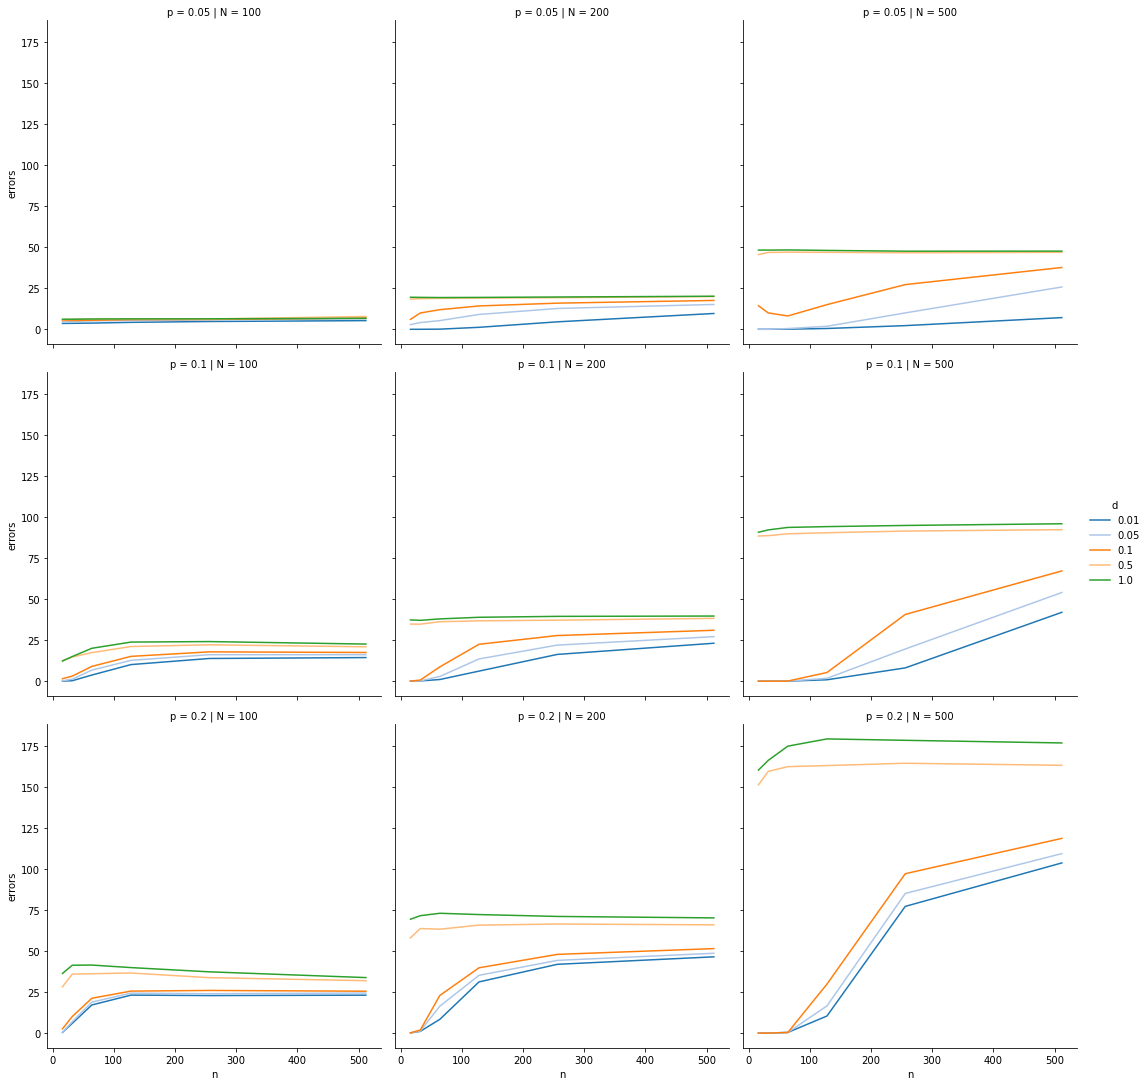

In [60]:
g = sns.relplot(x='n', y='errors', col='N', row="p", hue = "d", data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': True})


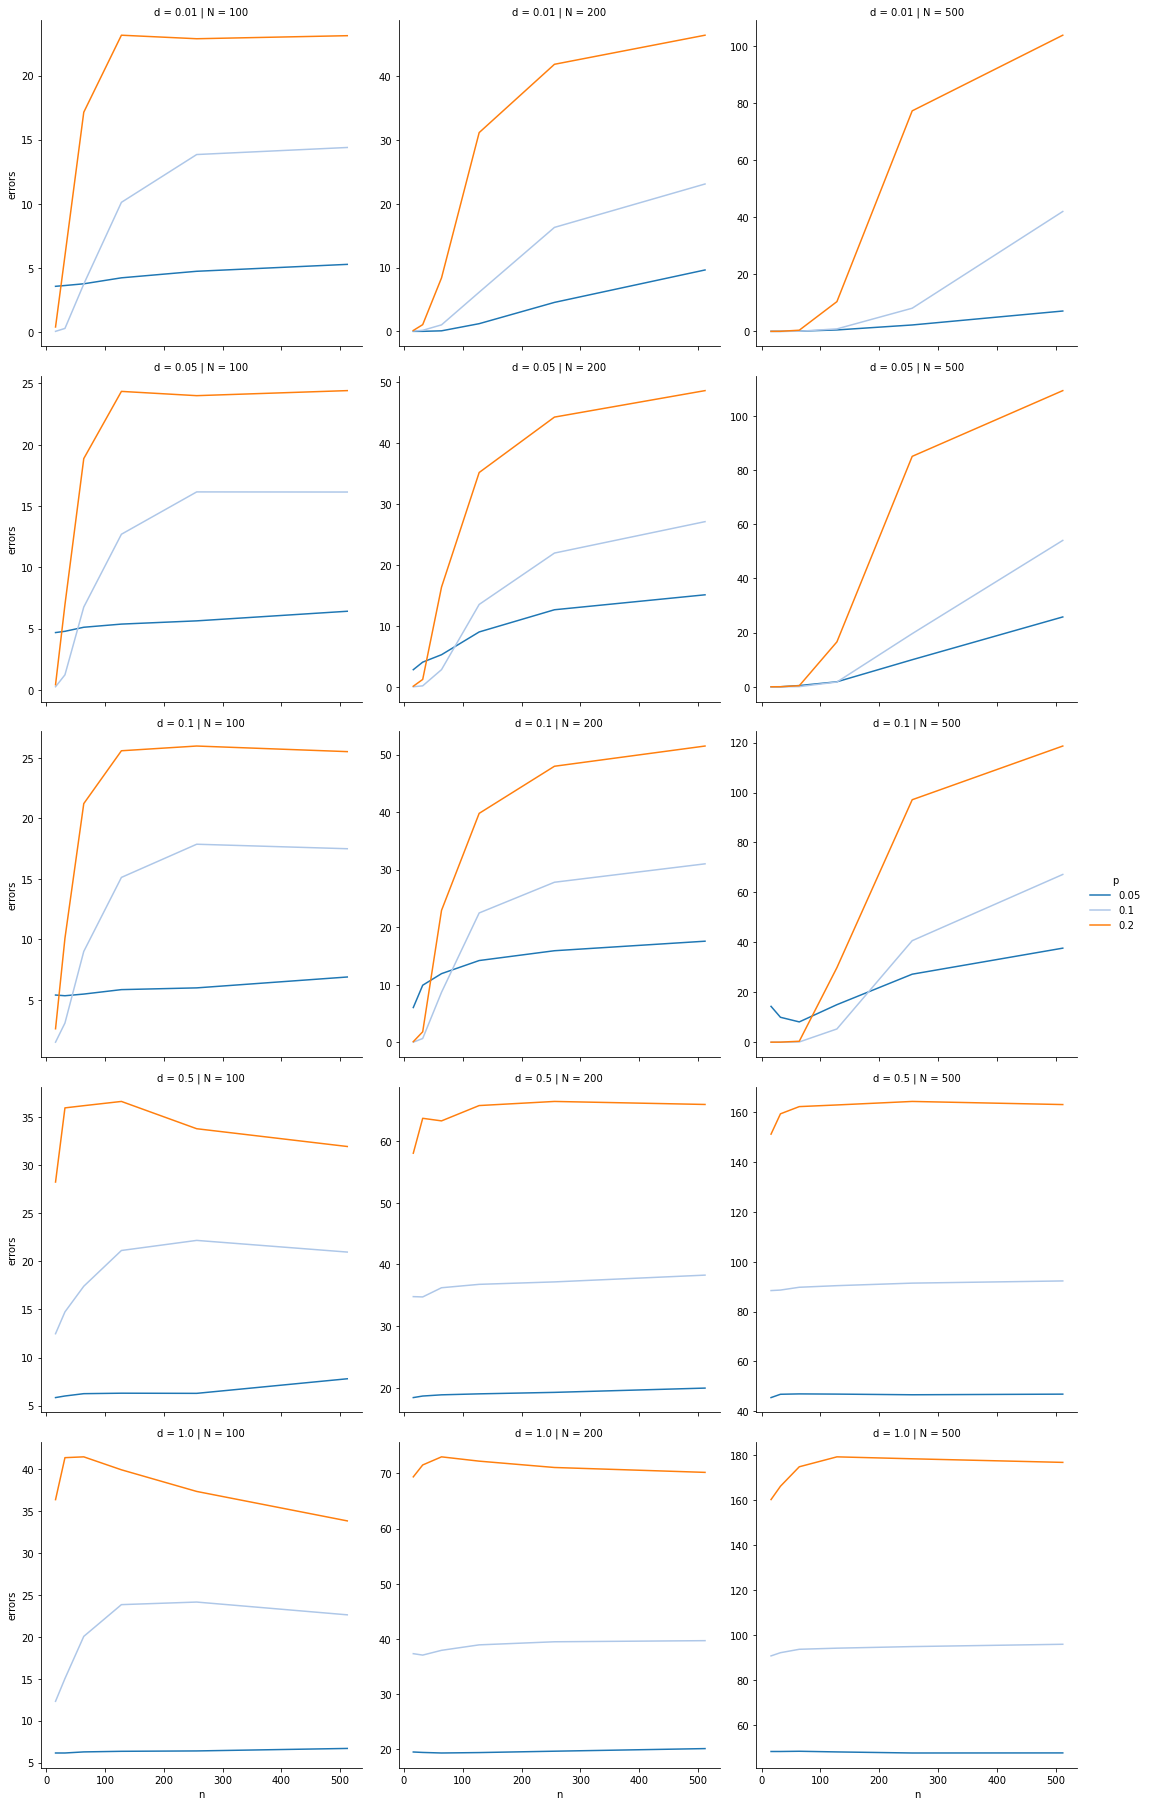

In [73]:
g = sns.relplot(x='n', y='errors', col='N', row='d', hue='p', data=Ug_err, kind='line', legend="full", palette="tab20", facet_kws={'sharey': False}) #, ci=None)
# g.axes[0,0].set_yscale('log')

# test with N=300,400

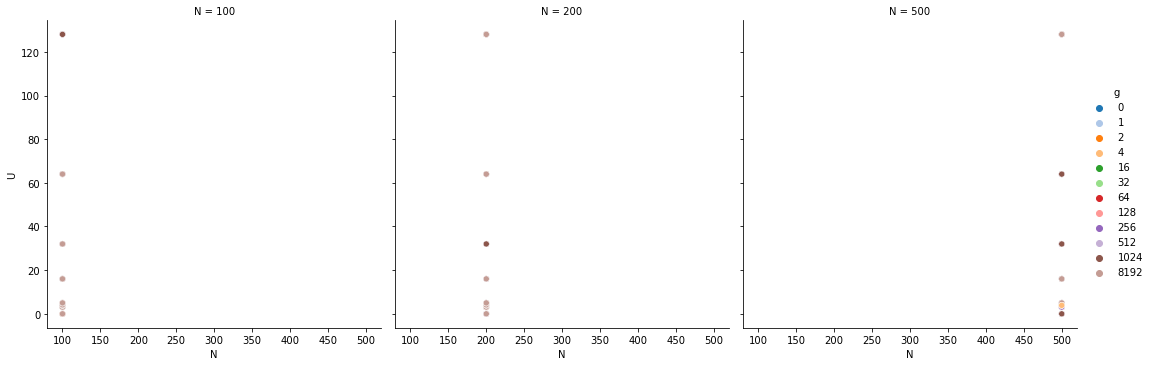

In [63]:
g = sns.relplot(x='N', y='U', hue='g', data=df_N, col="N", kind='scatter', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

### Success of U & g by N

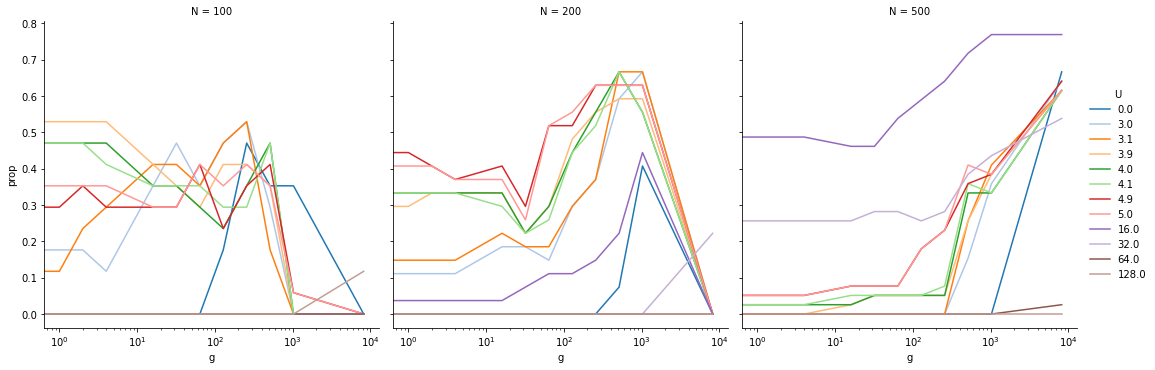

In [28]:
g = sns.relplot(x='g', y='prop', hue='U', data=df_N, col="N", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])

g.axes[0,0].set_xscale('log')

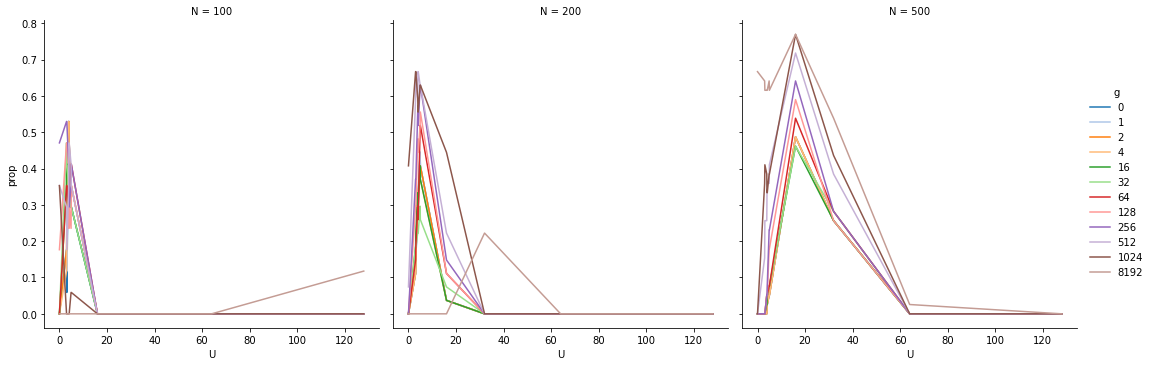

In [32]:
g = sns.relplot(x='U', y='prop', hue='g', data=df_N, col="N", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

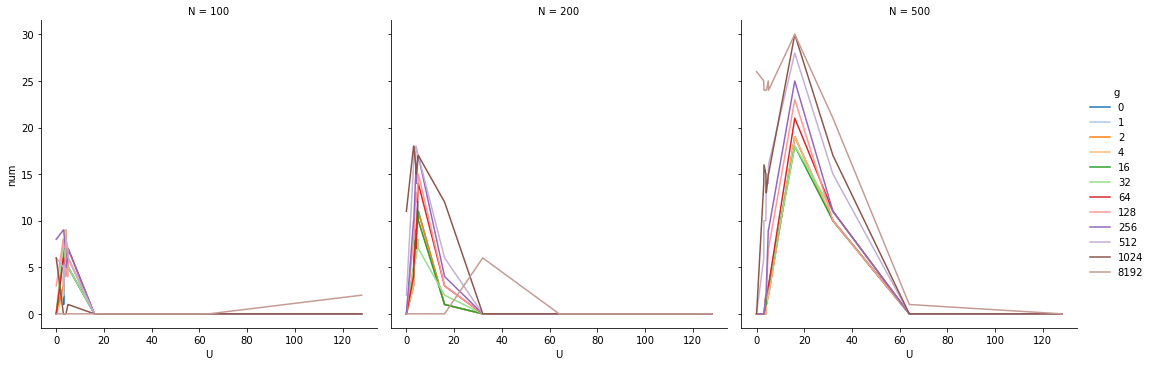

In [33]:
g = sns.relplot(x='U', y='num', hue='g', data=df_N, col="N", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

### Success of U & g by p

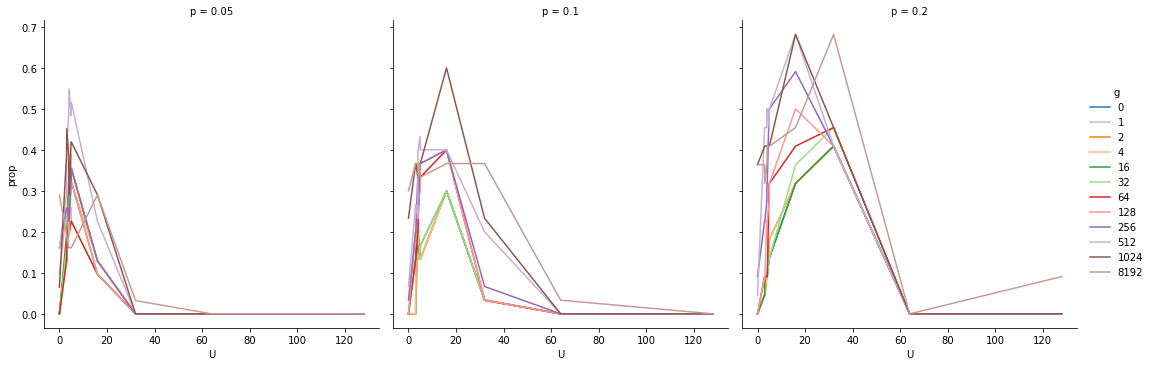

In [34]:
g = sns.relplot(x='U', y='prop', hue='g', data=df_p, col="p", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

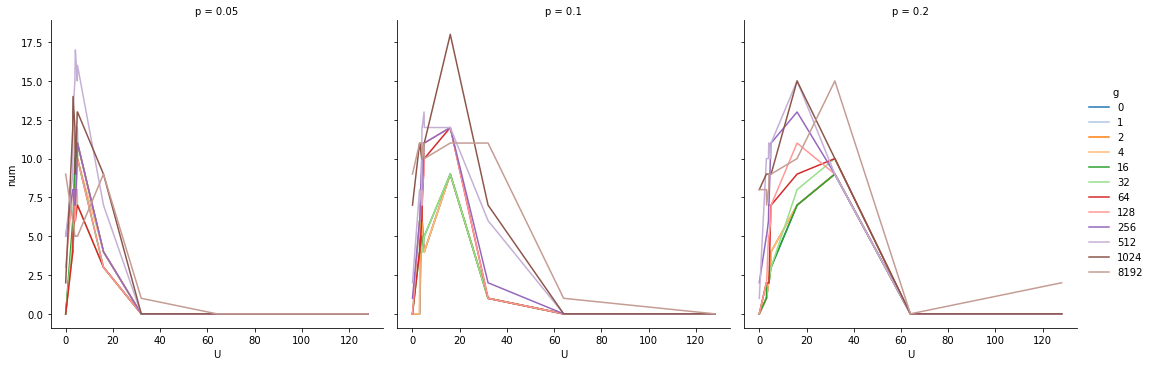

In [35]:
g = sns.relplot(x='U', y='num', hue='g', data=df_p, col="p", kind='line', legend="full", palette="tab20", markers=['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'])
g

In [56]:
df100avg = df_100_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df200avg = df_200_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()
df500avg = df_500_.groupby(by=["N","n","d","p","U","g"], as_index=False)["errors"].mean()

In [145]:
# def do_stat(df_n, N, p, n, d, delta=1):

#     res = {}
#     totals = {}

#     for i in range(len(N)):
#         for l in range(len(p)):
#             res[N[i],p[l]] = {}
#             totals[N[i],p[l]] = 0
#             for j in range(len(n)):
#                 for k in range(len(d)):
#                     df_ijkl = df_n[(df_n.N == N[i]) & (df_n.n == n[j]) & (df_n.d == d[k]) & (df_n.p == p[l])]
#                     assert len(df_ijkl) == len(U)*len(g), (df_ijkl, N[i], n[j], d[k], p[l])
#     #                 if not df_ijkl.empty:
#                     ind = np.argmin(df_ijkl['errors'])
#                     err = df_ijkl.iloc[ind]['errors']
#                     df_filt = df_ijkl[(df_ijkl.errors < err + delta)]
#                     if err < min(0.9*N[i]*p[l], N[i]*d[k]):
#                         totals[N[i],p[l]] = totals[N[i],p[l]] + 1

#                         for row in df_filt.itertuples():
#                             if (row.U,row.g) not in res[row.N,row.p]:
#                                 res[row.N,row.p][row.U,row.g] = 1
#                             else:
#                                 res[row.N,row.p][row.U,row.g] = res[row.N,row.p][row.U,row.g] + 1 


#     return(res,totals)